In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
base_path = '/home/jovyan/work/Molecular_Properties'

In [75]:
#sub1 = pd.read_csv(f'./submission_model_by_type_lgbm.csv')
#sub1 = pd.read_csv('./my_lgbm_responsible_chemistry_kernel.csv')
#sub1 = pd.read_csv('./my_lgbm_responsible_chemistry_kernel.csv')
#sub1 = pd.read_csv('./my_lgb_and_sergej_kernel.csv')
#sub1 = pd.read_csv('./my_lgbm_responsible_chemistry_kernel_mpnn.csv')
#sub1 = pd.read_csv(f'./my_lgb_responsible_chemistry.csv')
#sub1 = pd.read_csv('./my_lgb_and_sergej_kernel.csv')
#sub1 = pd.read_csv(f'{base_path}/responsible_chemistry.csv')
sub1 = pd.read_csv(f'{base_path}/my_best_blend_and_superblend_kernel_70_30.csv')
#sub1 = pd.read_csv('./my_best_blend_super_blend_and_imporved_criskiev.csv')
#sub1 = pd.read_csv('./chemistry_of_best_models-1.835.csv')
#sub2 = pd.read_csv('./2019-07-09 09_19_00_LightGBM.csv')
#sub2 = pd.read_csv('./steal_like_an_electron_kernel.csv')
#sub2 = pd.read_csv('./weighted-avg-blend-lgb-keras-1-for_blending.csv')
#sub2 = pd.read_csv('./steal_like_an_electron_kernel.csv')
#sub2 = pd.read_csv('./submission_model_by_type_catboost.csv')
#sub2 = pd.read_csv('./stack_median.csv')
#sub2 = pd.read_csv('./сhemistry_of_subs_kernel.csv')
#sub2 = pd.read_csv(f'./submission_model_by_type_lgbm_10_folds.csv')
#sub2 = pd.read_csv(f'{base_path}/responsible_chemistry.csv')
#sub2 = pd.read_csv(f'{base_path}/keras_nn_kernal.csv')
#sub2 = pd.read_csv(f'{base_path}/submission_mpnn.csv')
#sub2 = pd.read_csv('./submission_model_by_type_keras.csv')
#sub2 = pd.read_csv('./submission_model_by_type_keras_no_2JHN.csv')
#sub2 = pd.read_csv("./submission_model_by_type_keras_updated.csv")
#sub2 = pd.read_csv(f'{base_path}/Aggblender.csv')
#sub2 = pd.read_csv("./submission_criskiev_20000est_5fold.csv")
#sub2 = pd.read_csv(f'{base_path}/super_blend_1_and_80.csv')
#sub2 = pd.read_csv("./submission_with_predicted_scalar_as_input_criskiev.csv")
sub2 = pd.read_csv("./my_features_and_criskiev_features_15000_est.csv")
#sub2 = pd.read_csv("./my_best_blend_super_blend_and_imporved_criskiev.csv")
print( sub1['scalar_coupling_constant'].describe())
print( sub2['scalar_coupling_constant'].describe())

count    2.505542e+06
mean     1.588527e+01
std      3.486160e+01
min     -3.276544e+01
25%     -2.417528e-01
50%      2.280196e+00
75%      7.353045e+00
max      2.039066e+02
Name: scalar_coupling_constant, dtype: float64
count    2.505542e+06
mean     1.588326e+01
std      3.486455e+01
min     -3.057450e+01
25%     -2.291792e-01
50%      2.278734e+00
75%      7.336329e+00
max      2.031759e+02
Name: scalar_coupling_constant, dtype: float64


In [76]:
# def trunc_at(s, d, n=3):
#     "Returns s truncated at the n'th (3rd by default) occurrence of the delimiter, d."
#     return d.join(s.split(d, n)[:n])

In [77]:
#sub2.scalar_coupling_constant = sub2.scalar_coupling_constant.to_string()

In [78]:
#sub2['scalar_coupling_constant'] = sub2['scalar_coupling_constant'].apply(lambda x: trunc_at(x, '.', 2))

In [79]:
#sub2['scalar_coupling_constant'] = pd.to_numeric(sub2['scalar_coupling_constant'])

In [80]:
#sub2.dtypes

In [81]:
sub1 = sub1.merge(sub2.drop_duplicates(subset=['id']), how = 'left',on = 'id')

In [82]:
sub1.describe()

,id,scalar_coupling_constant_x,scalar_coupling_constant_y
count,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.588527e+01,1.588326e+01
std,7.232878e+05,3.486160e+01,3.486455e+01
min,4.658147e+06,-3.276544e+01,-3.057450e+01
25%,5.284532e+06,-2.417528e-01,-2.291792e-01
50%,5.910918e+06,2.280196e+00,2.278734e+00
75%,6.537303e+06,7.353045e+00,7.336329e+00
max,7.163688e+06,2.039066e+02,2.031759e+02


In [83]:
#sub1 = sub1.fillna("NaN")
#sub1.scalar_coupling_constant_y  = sub1.scalar_coupling_constant_y.fillna(value=sub1.scalar_coupling_constant_x)

In [84]:
( sub1['scalar_coupling_constant_x'] - sub1['scalar_coupling_constant_y']).abs().mean()

0.13671974512116758

In [85]:
sub1.describe()

,id,scalar_coupling_constant_x,scalar_coupling_constant_y
count,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.588527e+01,1.588326e+01
std,7.232878e+05,3.486160e+01,3.486455e+01
min,4.658147e+06,-3.276544e+01,-3.057450e+01
25%,5.284532e+06,-2.417528e-01,-2.291792e-01
50%,5.910918e+06,2.280196e+00,2.278734e+00
75%,6.537303e+06,7.353045e+00,7.336329e+00
max,7.163688e+06,2.039066e+02,2.031759e+02


In [92]:
sub1['scalar_coupling_constant'] = (0.6*sub1['scalar_coupling_constant_x'] + 0.4*sub1['scalar_coupling_constant_y'])
sub1['scalar_coupling_constant'].describe()

count    2.505542e+06
mean     1.588386e+01
std      3.486347e+01
min     -3.123178e+01
25%     -2.315732e-01
50%      2.278330e+00
75%      7.341131e+00
max      2.032561e+02
Name: scalar_coupling_constant, dtype: float64

In [93]:
sub1['scalar_coupling_constant'].describe(include = 'all')

count    2.505542e+06
mean     1.588386e+01
std      3.486347e+01
min     -3.123178e+01
25%     -2.315732e-01
50%      2.278330e+00
75%      7.341131e+00
max      2.032561e+02
Name: scalar_coupling_constant, dtype: float64

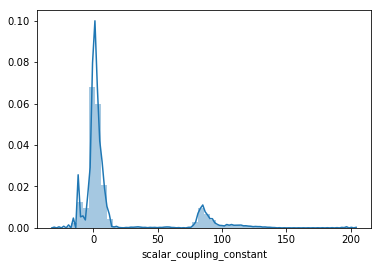

In [94]:
sns.distplot(sub1['scalar_coupling_constant'])

In [95]:
sub1[['id', 'scalar_coupling_constant']].to_csv('my_super_blend_my_lgb_kriskiev_features.csv', index=False)

In [96]:
!kaggle competitions submit -c champs-scalar-coupling -f my_super_blend_best_public_blend.csv -m "my super blend and my lgb with criskiev features 60/40"

100%|██████████████████████████████████████| 64.0M/64.0M [00:05<00:00, 13.3MB/s]
Successfully submitted to Predicting Molecular Properties